# Importing Libraries and the Dataset

In [4]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt, re

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df = pd.read_csv('in-vehicle-coupon-recommendation.csv')

In [7]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


# 1. EDA

In [8]:
df.shape

(12684, 26)

### Finding Categorical Columns and the number of labels in each of those columns

In [9]:
cat_cols = [(col,len(df[col].value_counts())) for col in df.columns if df[col].dtype == 'O']

In [10]:
cat_cols

[('destination', 3),
 ('passanger', 4),
 ('weather', 3),
 ('time', 5),
 ('coupon', 5),
 ('expiration', 2),
 ('gender', 2),
 ('age', 8),
 ('maritalStatus', 5),
 ('education', 6),
 ('occupation', 25),
 ('income', 9),
 ('car', 5),
 ('Bar', 5),
 ('CoffeeHouse', 5),
 ('CarryAway', 5),
 ('RestaurantLessThan20', 5),
 ('Restaurant20To50', 5)]

In [11]:
len(cat_cols)

18

### Presence of Null Values

<AxesSubplot:>

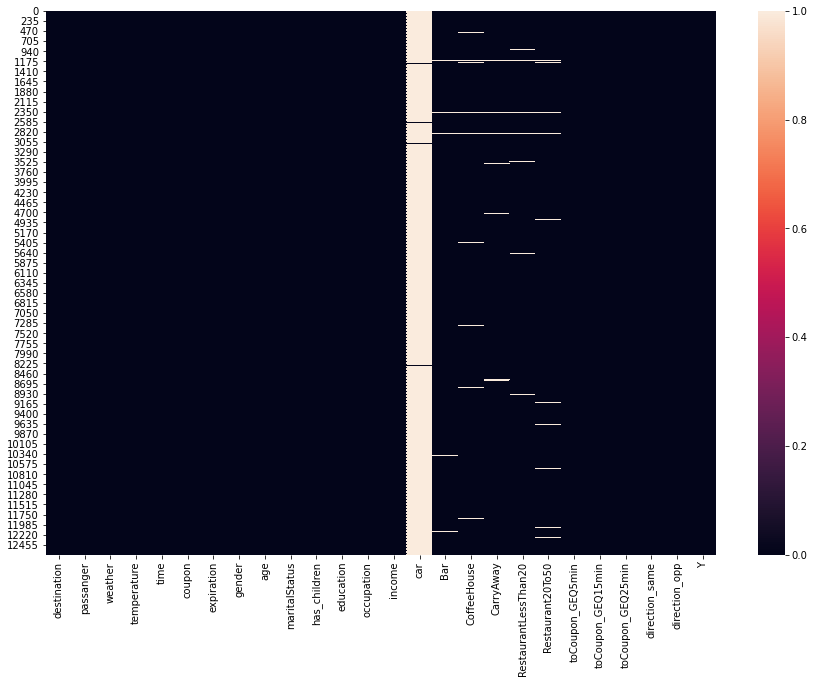

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull())

# 2. FEATURE ENGINEERING

### Following categories have missing values:
    1. car
    2. Bar
    3. CoffeHouse
    4. CarryAway
    5. RestaurentLessThan20
    6. Restaurent20to50

In [13]:
df['car'].isnull().value_counts()[1]/df.shape[0]*100

99.14853358561967

In [14]:
# Column 'car' has more than 99% of missing values, so it is better to drop the column.
df.drop('car', axis=1, inplace=True)

In [15]:
df['Bar'].isnull().value_counts()

False    12577
True       107
Name: Bar, dtype: int64

In [16]:
df['Bar'].value_counts()

never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: Bar, dtype: int64

In [17]:
# Missing values in 'Bar' can be imputed with all the labels by equal distribution among them.(i.e. 20 for each label)
df['Bar'].fillna(value='never', inplace=True, limit=20)
df['Bar'].fillna(value='less1', inplace=True, limit=20)
df['Bar'].fillna(value='1~3', inplace=True, limit=20)
df['Bar'].fillna(value='4~8', inplace=True, limit=20)
df['Bar'].fillna(value='gt8', inplace=True, limit=27)

In [18]:
df['CoffeeHouse'].isnull().value_counts()

False    12467
True       217
Name: CoffeeHouse, dtype: int64

In [19]:
df['CoffeeHouse'].value_counts()

less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: CoffeeHouse, dtype: int64

In [20]:
# Missing values in 'CoffeeHouse' can be imputed using the same method for 'Bar'
df['CoffeeHouse'].fillna(value='less1', inplace=True, limit=40)
df['CoffeeHouse'].fillna(value='1~3', inplace=True, limit=40)
df['CoffeeHouse'].fillna(value='never', inplace=True, limit=40)
df['CoffeeHouse'].fillna(value='4~8', inplace=True, limit=40)
df['CoffeeHouse'].fillna(value='gt8', inplace=True, limit=57)

In [21]:
df['CarryAway'].isnull().value_counts()

False    12533
True       151
Name: CarryAway, dtype: int64

In [22]:
df['CarryAway'].value_counts()

1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: CarryAway, dtype: int64

In [23]:
# Same imputation method as above
df['CarryAway'].fillna(value='1~3', inplace=True, limit=30)
df['CarryAway'].fillna(value='4~8', inplace=True, limit=30)
df['CarryAway'].fillna(value='less1', inplace=True, limit=30)
df['CarryAway'].fillna(value='gt8', inplace=True, limit=30)
df['CarryAway'].fillna(value='never', inplace=True, limit=31)

In [24]:
df['RestaurantLessThan20'].isnull().value_counts()

False    12554
True       130
Name: RestaurantLessThan20, dtype: int64

In [25]:
df['RestaurantLessThan20'].value_counts()

1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: RestaurantLessThan20, dtype: int64

In [26]:
# Same imputation method as above
df['RestaurantLessThan20'].fillna(value='1~3', inplace=True, limit=26)
df['RestaurantLessThan20'].fillna(value='4~8', inplace=True, limit=26)
df['RestaurantLessThan20'].fillna(value='less1', inplace=True, limit=26)
df['RestaurantLessThan20'].fillna(value='gt8', inplace=True, limit=26)
df['RestaurantLessThan20'].fillna(value='never', inplace=True, limit=26)

In [27]:
df['Restaurant20To50'].isnull().value_counts()

False    12495
True       189
Name: Restaurant20To50, dtype: int64

In [28]:
df['Restaurant20To50'].value_counts()

less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: Restaurant20To50, dtype: int64

In [29]:
# Same imputation method as above
df['Restaurant20To50'].fillna(value='less1', inplace=True, limit=37)
df['Restaurant20To50'].fillna(value='1~3', inplace=True, limit=37)
df['Restaurant20To50'].fillna(value='never', inplace=True, limit=37)
df['Restaurant20To50'].fillna(value='4~8', inplace=True, limit=37)
df['Restaurant20To50'].fillna(value='gt8', inplace=True, limit=41)

<AxesSubplot:>

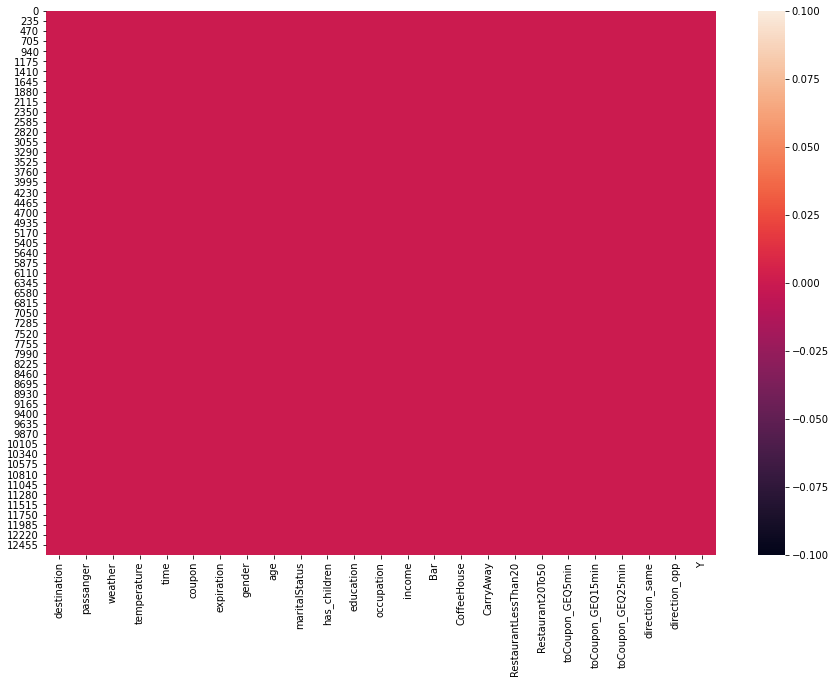

In [30]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull())

### All missing values are handled

In [31]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,0,0,1,0


In [32]:
print(cat_cols)

[('destination', 3), ('passanger', 4), ('weather', 3), ('time', 5), ('coupon', 5), ('expiration', 2), ('gender', 2), ('age', 8), ('maritalStatus', 5), ('education', 6), ('occupation', 25), ('income', 9), ('car', 5), ('Bar', 5), ('CoffeeHouse', 5), ('CarryAway', 5), ('RestaurantLessThan20', 5), ('Restaurant20To50', 5)]


In [33]:
df['destination'].value_counts()

No Urgent Place    6283
Home               3237
Work               3164
Name: destination, dtype: int64

In [34]:
df['passanger'].value_counts()

Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: passanger, dtype: int64

In [35]:
df['weather'].value_counts()

Sunny    10069
Snowy     1405
Rainy     1210
Name: weather, dtype: int64

In [36]:
df['time'].value_counts()

6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: time, dtype: int64

#### Time can be converted into a numerical feature using some regex

In [37]:
re.split('(\d+)', '9PM')[1]

'9'

In [38]:
df['time'] = pd.to_numeric(df['time'].map(lambda x: re.split('(\d+)', x)[1]))

In [39]:
df['coupon'].value_counts()

Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: coupon, dtype: int64

In [40]:
df['expiration'].value_counts()

1d    7091
2h    5593
Name: expiration, dtype: int64

#### Expiration can also be converted to a numerical feature

In [41]:
exp = {'1d':24, '2h':2}

In [42]:
df['expiration'] = df['expiration'].map(exp)

In [43]:
df['gender'].value_counts()

Female    6511
Male      6173
Name: gender, dtype: int64

In [44]:
df['age'].value_counts()

21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: age, dtype: int64

#### Converting age to a numerical feature

In [45]:
age_map = {'50plus':55, 'below21':18, '21':21,'26':26, '31':31, '36':36, '41':41, '46':46}

In [46]:
df['age'] = pd.to_numeric(df['age'].map(age_map))

In [47]:
df['maritalStatus'].value_counts()

Married partner      5100
Single               4752
Unmarried partner    2186
Divorced              516
Widowed               130
Name: maritalStatus, dtype: int64

In [48]:
df['education'].value_counts()

Some college - no degree                  4351
Bachelors degree                          4335
Graduate degree (Masters or Doctorate)    1852
Associates degree                         1153
High School Graduate                       905
Some High School                            88
Name: education, dtype: int64

In [49]:
df['occupation'].value_counts()

Unemployed                                   1870
Student                                      1584
Computer & Mathematical                      1408
Sales & Related                              1093
Education&Training&Library                    943
Management                                    838
Office & Administrative Support               639
Arts Design Entertainment Sports & Media      629
Business & Financial                          544
Retired                                       495
Food Preparation & Serving Related            298
Healthcare Practitioners & Technical          244
Healthcare Support                            242
Community & Social Services                   241
Legal                                         219
Transportation & Material Moving              218
Architecture & Engineering                    175
Personal Care & Service                       175
Protective Service                            175
Life Physical Social Science                  170


In [50]:
top_10_occupat = [occupat for occupat in df['occupation'].value_counts().index[:10]]

In [51]:
def occupat_imputer(i):
    if i in top_10_occupat:
        return i
    else:
        return 'Other'

In [52]:
df['occupation'] = df['occupation'].apply(occupat_imputer)

#### Converting income to a numerical column

In [53]:
df['income'].value_counts()

$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
Name: income, dtype: int64

In [54]:
def income_imputer(df, col):
    income_imputed = []
    for i in df[col]:
        inc = [int(i) for i in re.findall('(\d+)', i)]
        income_imputed.append(int(sum(inc)/len(inc)))
    df[col] = income_imputed

In [55]:
income_imputer(df, 'income')

In [56]:
df['income'].value_counts()

31249     2013
18749     1831
43749     1805
100000    1736
56249     1659
12500     1042
93749      895
81249      857
68749      846
Name: income, dtype: int64

#### Bar ->> Numerical Column

In [57]:
df['Bar'].value_counts()

never    5217
less1    3502
1~3      2493
4~8      1096
gt8       376
Name: Bar, dtype: int64

In [58]:
bar_map = {'never':0, 'less1':1, '1~3':2, '4~8':6, 'gt8':9}
df['Bar'] = df['Bar'].map(bar_map)

In [59]:
df['CoffeeHouse'].value_counts()

less1    3425
1~3      3265
never    3002
4~8      1824
gt8      1168
Name: CoffeeHouse, dtype: int64

In [60]:
coffeehouse_map = {'never':0, 'less1':1, '1~3':2, '4~8':6, 'gt8':9}
df['CoffeeHouse'] = df['CoffeeHouse'].map(coffeehouse_map)

#### Same for CarryAway, RestaurentLessThan20, Restaurent20-50 --> Converting to numerical Columns

In [61]:
df['CarryAway'].value_counts()

1~3      4702
4~8      4288
less1    1886
gt8      1624
never     184
Name: CarryAway, dtype: int64

In [62]:
df['RestaurantLessThan20'].value_counts()

1~3      5402
4~8      3606
less1    2119
gt8      1311
never     246
Name: RestaurantLessThan20, dtype: int64

In [63]:
df['Restaurant20To50'].value_counts()

less1    6114
1~3      3327
never    2173
4~8       765
gt8       305
Name: Restaurant20To50, dtype: int64

In [64]:
common_map = {'never':0, 'less1':1, '1~3':2, '4~8':6, 'gt8':9}
df['CarryAway'] = df['CarryAway'].map(common_map)
df['RestaurantLessThan20'] = df['RestaurantLessThan20'].map(common_map)
df['Restaurant20To50'] = df['Restaurant20To50'].map(common_map)

In [65]:
cat_cols = [(col,len(df[col].value_counts())) for col in df.columns if df[col].dtype == 'O']

In [66]:
cat_cols

[('destination', 3),
 ('passanger', 4),
 ('weather', 3),
 ('coupon', 5),
 ('gender', 2),
 ('maritalStatus', 5),
 ('education', 6),
 ('occupation', 11)]

#### direction_same and direction_opp denote the same thing, so it is better to drop one of them.

In [67]:
df.drop('direction_opp', axis=1, inplace=True)

### Encoding remaining categorical columns 

In [68]:
df_final = pd.get_dummies(df, drop_first=True)

In [69]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 47 columns):
 #   Column                                            Non-Null Count  Dtype
---  ------                                            --------------  -----
 0   temperature                                       12684 non-null  int64
 1   time                                              12684 non-null  int64
 2   expiration                                        12684 non-null  int64
 3   age                                               12684 non-null  int64
 4   has_children                                      12684 non-null  int64
 5   income                                            12684 non-null  int64
 6   Bar                                               12684 non-null  int64
 7   CoffeeHouse                                       12684 non-null  int64
 8   CarryAway                                         12684 non-null  int64
 9   RestaurantLessThan20                   

### Converting to train and test dataset

In [70]:
X = df_final.drop('Y', axis=1)
y = df_final['Y']

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# 3. FEATURE SELECTION

<AxesSubplot:>

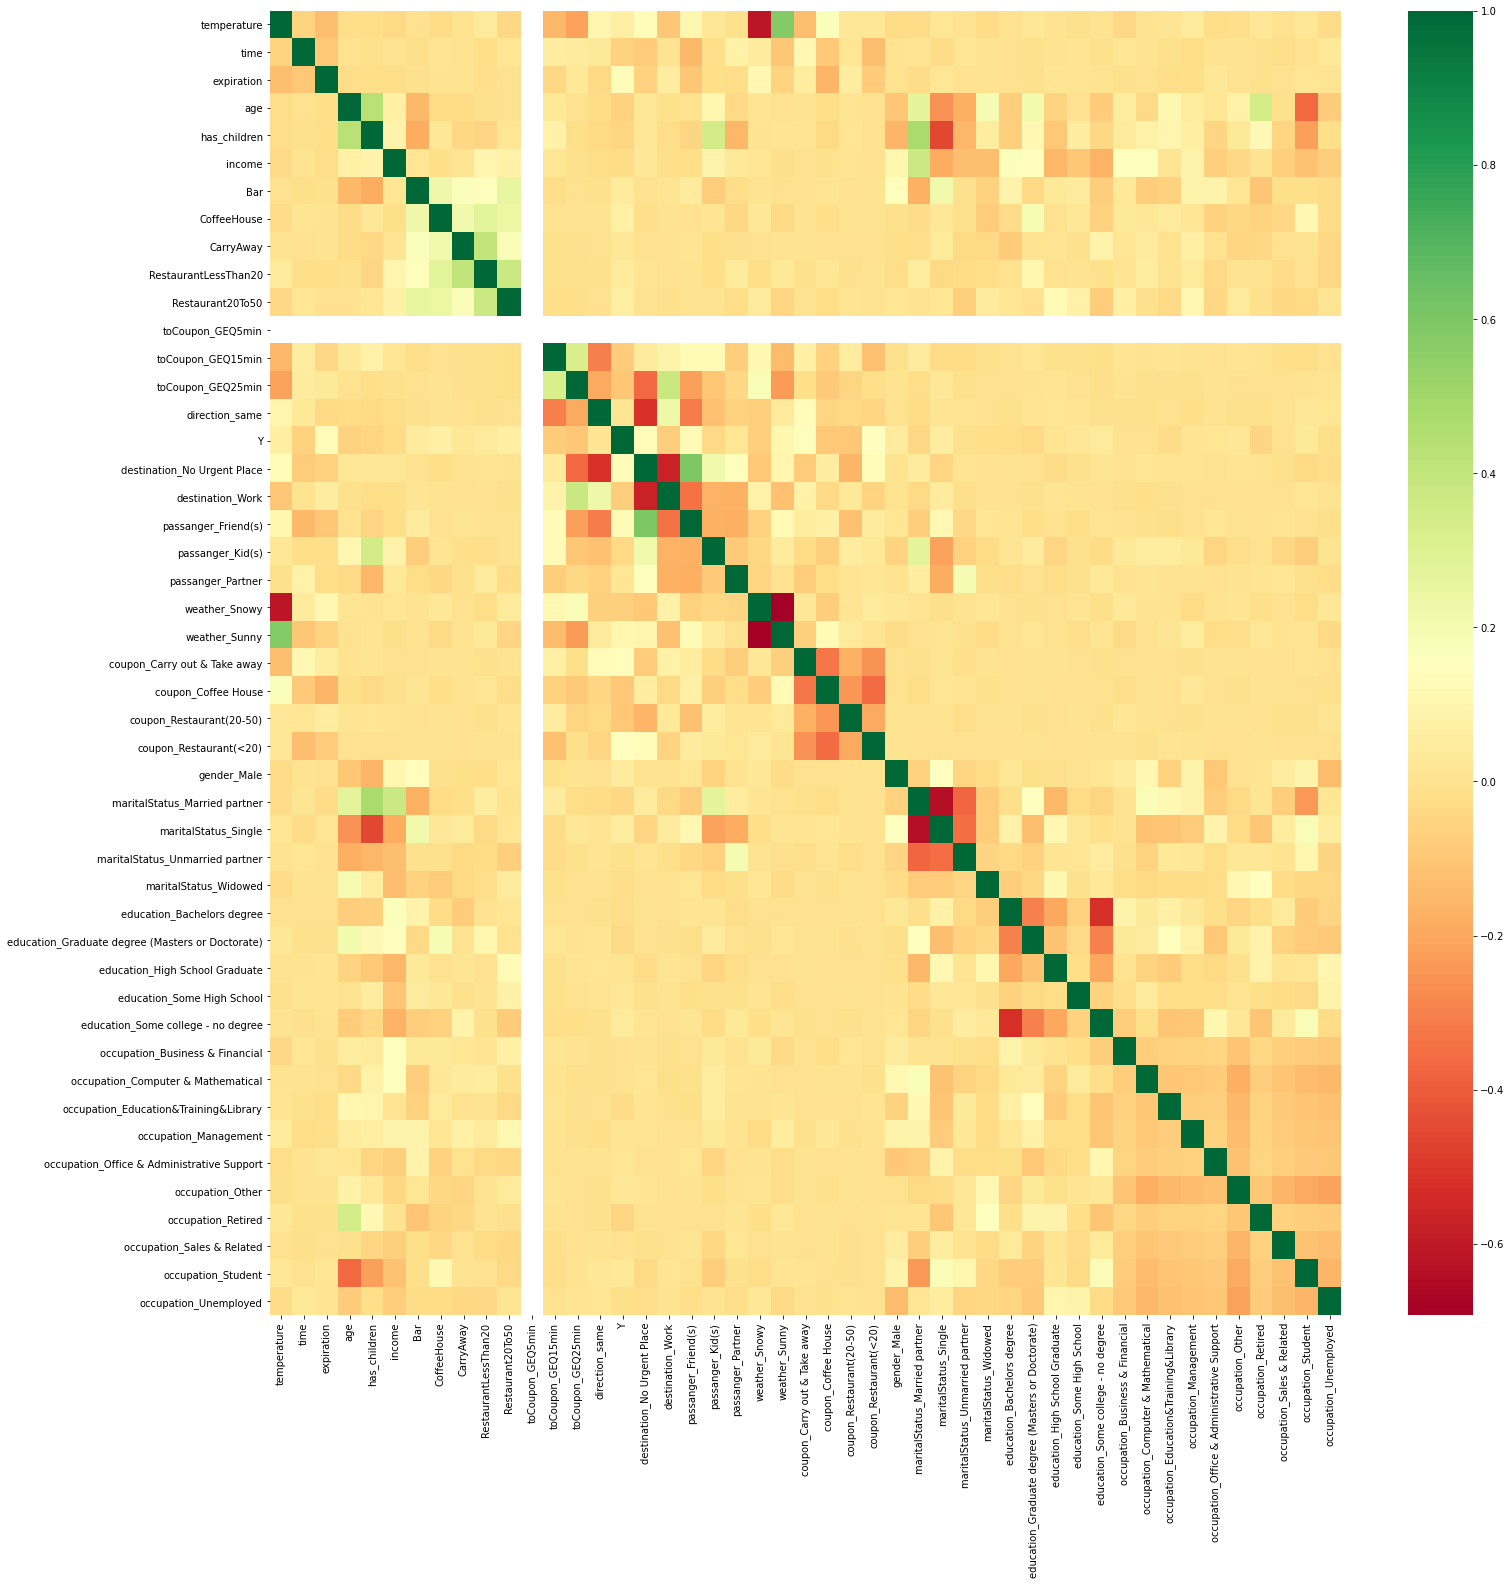

In [72]:
plt.figure(figsize=(24, 24))
sns.heatmap(df_final.corr(), cmap='RdYlGn')

In [73]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

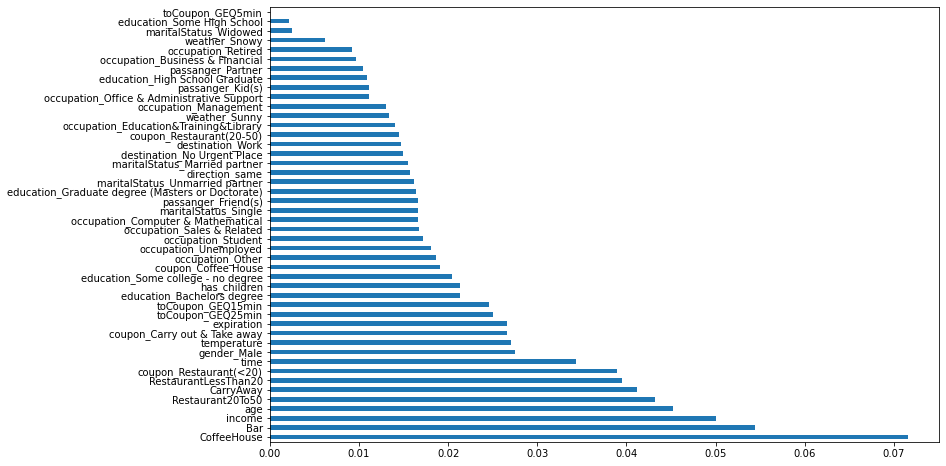

In [74]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(50).plot(kind='barh')
plt.show()

# 4. TRAINING THE ML ALGORITHMS

## RANDOM FOREST

In [75]:
from sklearn.ensemble import RandomForestClassifier
classif_rf = RandomForestClassifier()
classif_rf.fit(X_train, y_train)

RandomForestClassifier()

In [76]:
y_pred = classif_rf.predict(X_test)

In [77]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.69      0.72      1072
           1       0.79      0.82      0.80      1465

    accuracy                           0.77      2537
   macro avg       0.76      0.76      0.76      2537
weighted avg       0.77      0.77      0.77      2537



In [79]:
confusion_matrix(y_test, y_pred)

array([[ 745,  327],
       [ 266, 1199]], dtype=int64)

In [80]:
accuracy_score(y_test, y_pred)

0.7662593614505321

# 5. Hyperparameter Tuning

In [81]:
from sklearn.model_selection import RandomizedSearchCV

In [82]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [83]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [84]:
rf_hp_tuned = RandomizedSearchCV(estimator = classif_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [85]:
rf_hp_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [86]:
rf_hp_tuned.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [87]:
y_pred_tuned = rf_hp_tuned.predict(X_test)

In [88]:
print(classification_report(y_test, y_pred_tuned))

              precision    recall  f1-score   support

           0       0.75      0.69      0.72      1072
           1       0.79      0.83      0.81      1465

    accuracy                           0.77      2537
   macro avg       0.77      0.76      0.76      2537
weighted avg       0.77      0.77      0.77      2537



In [89]:
accuracy_score(y_test, y_pred_tuned)

0.773354355538037

## ADABOOST

In [90]:
from sklearn.ensemble import AdaBoostClassifier
classif_adaboost = AdaBoostClassifier()

In [91]:
classif_adaboost.fit(X_train, y_train)

AdaBoostClassifier()

In [92]:
y_pred_adaboost = classif_adaboost.predict(X_test)

In [93]:
accuracy_score(y_test, y_pred_adaboost)

0.6976744186046512

## XGBOOST

In [94]:
from xgboost import XGBClassifier
classif_xgboost = XGBClassifier()

#### One of the feature names contain symbols which are not allowed for XGBoost. It should be removed.

In [95]:
illegal = []
forbidden = ['[',']', '<']
for col in X_train.columns:
    for forbid in forbidden:
        if forbid not in col:
            pass
        else:
            illegal.append(col)
illegal

['coupon_Restaurant(<20)']

In [96]:
df_final.rename(columns={illegal[0]:'Coupon_RestaurantLessThan20'}, inplace=True)

In [97]:
#Performing train-test split again due to the column name change
X = df_final.drop('Y', axis=1)
y = df_final['Y']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [98]:
classif_xgboost.fit(X_train, y_train)
y_pred_xgboost = classif_xgboost.predict(X_test)

C:\Users\Asus\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:39:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [99]:
accuracy_score(y_test, y_pred_xgboost)

0.773354355538037

## NAIVE BAYES

In [103]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [104]:
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

In [434]:
accuracy_score(y_test, y_pred_gnb)

0.6452502956247537

# Scaling Features

In [107]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled

array([[-0.43342979, -1.84420117,  0.8881139 , ..., -0.30707865,
        -0.37776011,  2.40476354],
       [ 0.87179896,  1.12675808, -1.1259817 , ..., -0.30707865,
        -0.37776011,  2.40476354],
       [ 0.87179896,  1.12675808, -1.1259817 , ..., -0.30707865,
        -0.37776011,  2.40476354],
       ...,
       [-1.73865855,  0.01264836,  0.8881139 , ...,  3.25649467,
        -0.37776011, -0.4158413 ],
       [-1.73865855,  0.01264836,  0.8881139 , ...,  3.25649467,
        -0.37776011, -0.4158413 ],
       [ 0.87179896,  0.01264836, -1.1259817 , ...,  3.25649467,
        -0.37776011, -0.4158413 ]])

### Train-Test Split

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=2)

## LOGISTIC REGRESSION

In [110]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [111]:
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [112]:
accuracy_score(y_test, y_pred_lr)

0.686637761135199

## SUPPORT VECTOR REGRESSION

In [113]:
from sklearn.svm import SVC
svc = SVC()

In [114]:
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

In [115]:
accuracy_score(y_test, y_pred_svc)

0.7347260543949546

### The best accuracy till now was given by Random forest after Hyperparameter Tuning